<a href="https://colab.research.google.com/github/phu-minh/cs116/blob/main/CS116_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas


     |████████████████████████████████| 994 kB 35.7 MB/s 
     |████████████████████████████████| 6.3 MB 40.7 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 


###1. Drawing "Clicks" on Map[

In [ ]:
import folium
import geopandas as gpd
#from google.colab import drive
#drive.mount('/content/gdrive')


In [ ]:
data = gpd.read_file('/content/drive/MyDrive/CS116/response.json')


In [ ]:
data.head()


dbh                    geometry
0    1  POINT (106.64816 10.78143)
1    1  POINT (106.69997 10.80689)
2    1  POINT (106.44963 10.99961)
3    1  POINT (106.70792 10.83483)
4    1  POINT (106.63170 10.82777)

In [ ]:
for col in data.columns:
    print(col)



dbh
geometry


In [ ]:
coordinates = []

coordinates_toy = []
for points in data["geometry"]:
    #print(points.coords[0])
    coordinates.append(points.coords[0])

i = 0
for points in data["geometry"]:
    if (i == 1000) :
      break
    #print(points.coords[0])
    coordinates_toy.append(points.coords[0])
    i+=1

In [ ]:
print(len(coordinates))

print(len(coordinates_toy))

242553
1000


In [ ]:
start_point = coordinates[0]
print(start_point)
x=start_point[0]
y=start_point[1]
m = folium.Map(location=[y,x], zoom_start=12, tiles="OpenStreetMap")



(106.648161516089, 10.7814305224087)


In [ ]:
for i in range(len(coordinates_toy)):
    a = coordinates_toy[i]
    folium.Circle(
        location=[a[1], a[0]],
        radius = 50,
        color = "cyan",fill = True
    ).add_to(m)

In [ ]:
m

###2. Heatmap of clicks

In [ ]:
from folium.plugins import HeatMap
import folium.plugins

In [ ]:
data_toy = []

#folium.plugins.HeatMap(data_toy).add_to(folium.FeatureGroup(name='Heat Map').add_to(m))
#folium.LayerControl().add_to(m)


for i in range(len(coordinates_toy)):
      temp = coordinates_toy[i]
      data_toy.append([temp[1],temp[0]])
print(data_toy)
m1 = folium.Map(location=[y,x], zoom_start=12, tiles="OpenStreetMap")


folium.plugins.HeatMap(data_toy).add_to(m1)

m1

[[10.7814305224087, 106.648161516089], [10.8068871425829, 106.699969377693], [10.9996122135294, 106.449627865816], [10.8348251700001, 106.707921054], [10.8277661451218, 106.631702384125], [10.8124968249153, 106.624493694615], [10.8236782083634, 106.739724725257], [10.7226773266551, 106.598097293604], [10.8585609849397, 106.739002853881], [10.8063901872849, 106.638017836069], [10.7141820901445, 106.624805347212], [10.8680238978864, 106.67741625693], [10.7851451700001, 106.708221054], [10.782474999, 106.752173771], [10.742724999, 106.752173771], [10.8138851700001, 106.706811054], [10.9842198065658, 106.448790109601], [10.8478770684363, 106.6757575103], [10.793784999, 106.751783771], [10.9894411813946, 106.445073255342], [10.809774999, 106.752503771], [10.769094999, 106.752443771], [10.761414999, 106.751663771], [10.7464919618805, 106.641819082568], [10.7930754147645, 106.666407422484], [10.9910241669576, 106.443129606138], [10.8314951700001, 106.707861054], [10.757394999, 106.752053771],

###Clustering


In [ ]:
data = gpd.read_file('/content/drive/MyDrive/CS116/response.json')
data_converted = data.to_crs('epsg:3857')


In [ ]:
data.head()

dbh                    geometry
0    1  POINT (106.64816 10.78143)
1    1  POINT (106.69997 10.80689)
2    1  POINT (106.44963 10.99961)
3    1  POINT (106.70792 10.83483)
4    1  POINT (106.63170 10.82777)

In [ ]:
data_converted.head()

dbh                          geometry
0    1  POINT (11872019.034 1207329.487)
1    1  POINT (11877786.259 1210214.349)
2    1  POINT (11849918.369 1232062.826)
3    1  POINT (11878671.435 1213380.697)
4    1  POINT (11870186.812 1212580.637)

In [ ]:
coordinates_converted = []
for points in data_converted["geometry"]:
    #print(points.coords[0])
    coordinates_converted.append(points.coords[0])

# coordinates_converted_toy = []
# i = 0
# for points in data_converted["geometry"]:
#     if (i == 1000) :
#       break
#     #print(points.coords[0])
#     coordinates_toy.append(points.coords[0])
#     i+=1

x = []
y = []
for points in data_converted["geometry"]:
    temp = points.coords[0]
    x.append(temp[1])
    y.append(temp[0])

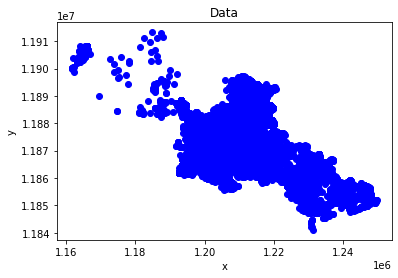

In [ ]:
import numpy as np 
from matplotlib import pyplot as plt 

x = np.array(x)
y = np.array(y)
plt.title("Data") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.plot(x,y,"ob") 
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns

In [ ]:
df1 = pd.DataFrame(list(zip(x, y)), columns =['latitude', 'longitude'])

In [ ]:
df1.head()

latitude     longitude
0  1.207329e+06  1.187202e+07
1  1.210214e+06  1.187779e+07
2  1.232063e+06  1.184992e+07
3  1.213381e+06  1.187867e+07
4  1.212581e+06  1.187019e+07

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242553 entries, 0 to 242552
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   latitude   242553 non-null  float64
 1   longitude  242553 non-null  float64
dtypes: float64(2)
memory usage: 3.7 MB


In [ ]:
df1.describe()

latitude     longitude
count  2.425530e+05  2.425530e+05
mean   1.211143e+06  1.187596e+07
std    8.836958e+03  9.087517e+03
min    1.161686e+06  1.184102e+07
25%    1.206984e+06  1.187138e+07
50%    1.209825e+06  1.187867e+07
75%    1.214114e+06  1.188356e+07
max    1.249741e+06  1.191325e+07

In [ ]:
df1.isnull().sum()

latitude     0
longitude    0
dtype: int64

In [ ]:
df1.drop_duplicates(inplace=True)

In [ ]:
X = df1.iloc[:, [0, 1]].values

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(100, 1000,100):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


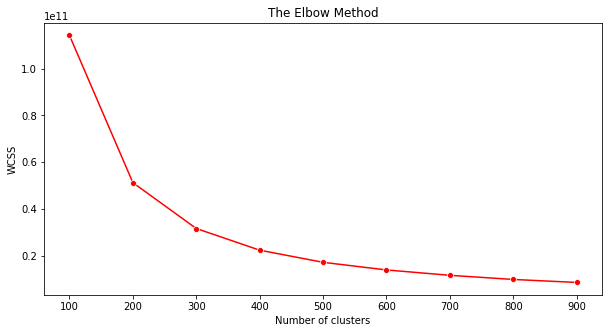

In [ ]:


plt.figure(figsize=(10,5))
sns.lineplot(range(100, 1000,100), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



####Chọn Cluster:

In [ ]:
kmeans = KMeans(n_clusters = 400, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

In [ ]:
y_kmeans

array([299, 265,   2, ..., 344, 196,  40], dtype=int32)

### Top 10 cluster

In [ ]:
from collections import Counter
counter = Counter(kmeans.labels_)  

In [ ]:
print(counter)

Counter({163: 6019, 32: 5545, 388: 5266, 196: 4405, 91: 3888, 158: 3834, 8: 3739, 166: 3697, 201: 3581, 351: 3571, 51: 3562, 251: 3357, 366: 3187, 14: 3115, 245: 3099, 115: 2925, 85: 2489, 270: 2451, 7: 2268, 34: 2202, 123: 1921, 164: 1884, 49: 1816, 103: 1615, 156: 1604, 20: 1585, 307: 1540, 272: 1511, 142: 1510, 299: 1483, 38: 1483, 23: 1471, 323: 1464, 165: 1442, 27: 1441, 314: 1437, 220: 1432, 120: 1417, 3: 1397, 238: 1396, 286: 1340, 361: 1316, 25: 1309, 376: 1297, 282: 1286, 177: 1220, 175: 1220, 198: 1202, 118: 1134, 249: 1121, 84: 1114, 36: 1090, 132: 1057, 161: 1045, 59: 1019, 202: 1010, 209: 1008, 242: 985, 1: 981, 70: 972, 391: 944, 296: 936, 173: 935, 117: 934, 43: 923, 292: 921, 305: 916, 45: 856, 108: 843, 18: 837, 298: 822, 248: 792, 83: 785, 126: 785, 308: 774, 95: 767, 54: 760, 60: 753, 52: 746, 350: 741, 11: 735, 285: 724, 186: 723, 333: 714, 381: 714, 6: 711, 146: 701, 172: 699, 215: 697, 222: 690, 65: 686, 137: 684, 61: 682, 274: 679, 53: 674, 316: 673, 208: 672, 77

In [ ]:
most = counter.most_common(10)
print(most)

[(163, 6019), (32, 5545), (388, 5266), (196, 4405), (91, 3888), (158, 3834), (8, 3739), (166, 3697), (201, 3581), (351, 3571)]


In [ ]:
top_10_labels = [m[0] for m in most]

In [ ]:
print(top_10_labels)

[163, 32, 388, 196, 91, 158, 8, 166, 201, 351]


In [ ]:
labels = kmeans.labels_

In [ ]:
colors = ["cyan","green","red","blue","pink", "brown","manegta","yellow","grey","purple"]

In [ ]:
map_top = folium.Map(location=[coordinates[0][1],coordinates[0][0]], zoom_start=12, tiles="OpenStreetMap")
for i in range(1000):
    a = coordinates[i]
    if labels[i] in top_10_labels:
        folium.Marker(location=[a[1], a[0]], 
                      icon = folium.Icon(color = colors[top_10_labels.index(labels[i])])
                      ).add_to(map_top)
    else :
        folium.Circle(location=[a[1], a[0]],
                      radius = 50,
                      color = "black",
                      fill = True).add_to(map_top)


In [ ]:
map_top

Notes: Em chưa hoàn thiện phần này. Việc tính KMeans theo epsg:3857 xong lại vẽ lên map theo espg:4325. Và phần chọn màu chưa đúng lắm

###Test section

In [ ]:
plt.figure(figsize=(15,7))

sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
 
centroids = kmeans.cluster_centers_
for cent in centroids:
   if cent in top_10_labels

sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of clicks')
plt.xlabel('Lattitude')
plt.ylabel('Longtitude')
plt.legend()
plt.show()

In [ ]:
import geopandas as gpd

In [ ]:
centroids = kmeans.cluster_centers_
top_10_centroids = []
for label in top_10_labels:
    temp = list(centroids[label])
    top_10_centroids.append(temp)
print(top_10_centroids)

top_10_centroids_df = pd.DataFrame(
    {'Latitude': [el[1] for el in top_10_centroids],
     'Longitude': [el[0] for el in top_10_centroids]})

top_10_centroids_gdf = gpd.GeoDataFrame(
    top_10_centroids_df, geometry=gpd.points_from_xy(top_10_centroids_df.Longitude, top_10_centroids_df.Latitude))

print(top_10_centroids_gdf)

[[1213290.2047752093, 11878693.61121332], [1213026.47121297, 11878727.90585876], [1212744.6863717386, 11878731.775647346], [1212463.5129757384, 11878742.92695894], [1213554.8209851824, 11878628.083462235], [1208532.2463243455, 11883579.118809732], [1204957.8831209394, 11883589.056905152], [1205258.5968239587, 11883589.0546422], [1204652.1225151392, 11883583.392010909], [1205552.614120402, 11883589.006236156]]
       Latitude     Longitude                          geometry
0  1.187869e+07  1.213290e+06  POINT (1213290.205 11878693.611)
1  1.187873e+07  1.213026e+06  POINT (1213026.471 11878727.906)
2  1.187873e+07  1.212745e+06  POINT (1212744.686 11878731.776)
3  1.187874e+07  1.212464e+06  POINT (1212463.513 11878742.927)
4  1.187863e+07  1.213555e+06  POINT (1213554.821 11878628.083)
5  1.188358e+07  1.208532e+06  POINT (1208532.246 11883579.119)
6  1.188359e+07  1.204958e+06  POINT (1204957.883 11883589.057)
7  1.188359e+07  1.205259e+06  POINT (1205258.597 11883589.055)
8  1.188358

In [ ]:
top_10_centroids_gdf = top_10_centroids_gdf.iloc[2]

top_10_centroids_gdf = top_10_centroids_gdf.to_crs('epsg:4326')
top_10_centroids_gdf.head()